# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [23]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Verify library imports
print("Libraries imported successfully:")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")

Libraries imported successfully:
pandas version: 2.2.2
numpy version: 2.0.2
seaborn version: 0.13.2


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [24]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

# Verify data loading
print("\nData loaded successfully. Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics:")
display(df.describe(include='all'))


Data loaded successfully. Shape: (175777, 14)

First 5 rows:


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20


Data types:
market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object

Basic statistics:


market_id           created_at actual_delivery_time  \
count   175777.000000               175777               175777   
unique            NaN               162649               160344   
top               NaN  2015-02-11 19:50:43  2015-02-15 04:18:47   
freq              NaN                    6                    5   
mean         2.743726                  NaN                  NaN   
std          1.330963                  NaN                  NaN   
min          1.000000                  NaN                  NaN   
25%          2.000000                  NaN                  NaN   
50%          2.000000                  NaN                  NaN   
75%          4.000000                  NaN                  NaN   
max          6.000000                  NaN                  NaN   

        store_primary_category  order_protocol    total_items       subtotal  \
count            175777.000000   175777.000000  175777.000000  175777.000000   
unique                     NaN             NaN            NaN            NaN   
top                        NaN             NaN            NaN            NaN   
freq                       NaN             NaN            NaN            NaN   
mean                 35.887949        2.911752       3.204976    2697.111147   
std                  20.728254        1.513128       2.674055    1828.554893   
min                   0.000000        1.000000       1.000000       0.000000   
25%                  18.000000        1.000000       2.000000    1412.000000   
50%                  38.000000        3.000000       3.000000    2224.000000   
75%                  55.000000        4.000000       4.000000    3410.000000   
max                  72.000000        7.000000     411.000000   26800.000000   

        num_distinct_items  min_item_price  max_item_price  \
count        175777.000000   175777.000000   175777.000000   
unique                 NaN             NaN             NaN   
top                    NaN             NaN             NaN   
freq                   NaN             NaN             NaN   
mean              2.675060      684.965433     1160.158616   
std               1.625681      519.882924      560.828571   
min               1.000000      -86.000000        0.000000   
25%               1.000000      299.000000      799.000000   
50%               2.000000      595.000000     1095.000000   
75%               3.000000      942.000000     1395.000000   
max              20.000000    14700.000000    14700.000000   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count           175777.000000       175777.000000             175777.000000   
unique                    NaN                 NaN                       NaN   
top                       NaN                 NaN                       NaN   
freq                      NaN                 NaN                       NaN   
mean                44.918664           41.861381                 58.230115   
std                 34.544724           32.168505                 52.731043   
min                 -4.000000           -5.000000                 -6.000000   
25%                 17.000000           15.000000                 17.000000   
50%                 37.000000           35.000000                 41.000000   
75%                 66.000000           63.000000                 85.000000   
max                171.000000          154.000000                285.000000   

             distance  
count   175777.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        21.843090  
std          8.748712  
min          0.000000  
25%         15.360000  
50%         21.760000  
75%         28.120000  
max         83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [25]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Verify conversion
print("\nAfter datetime conversion:")
print(f"created_at dtype: {df['created_at'].dtype}")
print(f"actual_delivery_time dtype: {df['actual_delivery_time'].dtype}")
print("\nSample datetime values:")
display(df[['created_at', 'actual_delivery_time']].head(3))


After datetime conversion:
created_at dtype: datetime64[ns]
actual_delivery_time dtype: datetime64[ns]

Sample datetime values:


created_at actual_delivery_time
0 2015-02-06 22:24:17  2015-02-06 23:11:17
1 2015-02-10 21:49:25  2015-02-10 22:33:25
2 2015-02-16 00:11:35  2015-02-16 01:06:35

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [26]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_cols] = df[categorical_cols].astype('category')

# Verify conversion
print("\nAfter categorical conversion:")
print(df[categorical_cols].dtypes)
print("\nUnique values in each categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Sample: {df[col].unique()[:5]}")  # Show first 5 unique values


After categorical conversion:
market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

Unique values in each categorical column:
market_id: 6 unique values
Sample: [1.0, 2.0, 3.0, 4.0, 5.0]
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
store_primary_category: 73 unique values
Sample: [4, 46, 36, 38, 58]
Categories (73, int64): [0, 1, 2, 3, ..., 69, 70, 71, 72]
order_protocol: 7 unique values
Sample: [1.0, 2.0, 3.0, 5.0, 4.0]
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [27]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Verify calculation
print("\nDelivery time calculation:")
print(f"New column 'time_taken' statistics:\n{df['time_taken'].describe()}")
print("\nSample calculations:")
display(df[['created_at', 'actual_delivery_time', 'time_taken']].head(3))


Delivery time calculation:
New column 'time_taken' statistics:
count    175777.000000
mean         46.203013
std           9.327424
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken, dtype: float64

Sample calculations:


created_at actual_delivery_time  time_taken
0 2015-02-06 22:24:17  2015-02-06 23:11:17        47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25        44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35        55.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [28]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_at'].dt.dayofweek >= 5  # 5=Saturday, 6=Sunday

# Verify new features
print("\nNew temporal features:")
print(f"Order hours range: {df['order_hour'].min()} to {df['order_hour'].max()}")
print(f"Day distribution:\n{df['order_day'].value_counts()}")
print(f"Weekend orders: {df['isWeekend'].sum()} ({df['isWeekend'].mean()*100:.1f}%)")

# Drop unnecessary columns
cols_to_drop = ['created_at', 'actual_delivery_time']
df = df.drop(columns=cols_to_drop)

# Verify column removal
print("\nAfter dropping columns:")
print(f"Remaining columns: {list(df.columns)}")
print(f"New shape: {df.shape}")


New temporal features:
Order hours range: 0 to 23
Day distribution:
order_day
Saturday     30858
Sunday       29893
Friday       25004
Monday       24202
Thursday     22584
Wednesday    21753
Tuesday      21483
Name: count, dtype: int64
Weekend orders: 60751 (34.6%)

After dropping columns:
Remaining columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken', 'order_hour', 'order_day', 'isWeekend']
New shape: (175777, 16)


In [29]:
# Drop unnecessary columns that won't be used for modeling
cols_to_drop = ['store_primary_category', 'order_day']  # Example columns to drop
df = df.drop(columns=cols_to_drop)

# Verify the columns were dropped
print("\nAfter dropping additional columns:")
print(f"Remaining columns: {list(df.columns)}")
print(f"DataFrame shape: {df.shape}")
print("\nSample of remaining data:")
display(df.head(3))


After dropping additional columns:
Remaining columns: ['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken', 'order_hour', 'isWeekend']
DataFrame shape: (175777, 14)

Sample of remaining data:


market_id order_protocol  total_items  subtotal  num_distinct_items  \
0       1.0            1.0            4      3441                   4   
1       2.0            2.0            1      1900                   1   
2       2.0            3.0            4      4771                   3   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2             820            1604                    8.0                 6.0   

   total_outstanding_orders  distance  time_taken  order_hour  isWeekend  
0                      21.0     34.44        47.0          22      False  
1                       2.0     27.60        44.0          21      False  
2                      18.0     11.56        55.0           0      False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [30]:
# Define target variable (y) and features (X)
X = df.drop(columns=['time_taken'])
y = df['time_taken']

# Verify the split
print("\nFeature and target variables created:")
print(f"X shape: {X.shape} (features)")
print(f"y shape: {y.shape} (target)")
print("\nFeature columns:")
print(list(X.columns))
print("\nTarget variable sample:")
print(y.head())


Feature and target variables created:
X shape: (175777, 13) (features)
y shape: (175777,) (target)

Feature columns:
['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']

Target variable sample:
0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken, dtype: float64


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [31]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Verify the split
print("\nTrain-test split completed:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print("\nTraining set features sample:")
display(X_train.head(3))
print("\nTest set target sample:")
print(y_test.head(3))


Train-test split completed:
Training set: 140621 samples (80.0%)
Test set: 35156 samples (20.0%)

Training set features sample:


market_id order_protocol  total_items  subtotal  num_distinct_items  \
102712       2.0            2.0            1       820                   1   
94576        4.0            3.0            1       995                   1   
49784        1.0            3.0            4      2040                   4   

        min_item_price  max_item_price  total_onshift_dashers  \
102712             745             745                   35.0   
94576              995             995                  110.0   
49784              150             895                    6.0   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
102712                39.0                      56.0     30.32          21   
94576                 72.0                     116.0     31.16           2   
49784                  3.0                       7.0     18.16          21   

        isWeekend  
102712      False  
94576       False  
49784       False


Test set target sample:
50609    50.0
49181    69.0
4526     41.0
Name: time_taken, dtype: float64


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [32]:
# Define numerical and categorical columns
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items',
                 'min_item_price', 'max_item_price', 'total_onshift_dashers',
                 'total_busy_dashers', 'total_outstanding_orders', 'distance',
                 'order_hour', 'time_taken']

categorical_cols = ['market_id', 'order_protocol', 'isWeekend']

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'time_taken']
Categorical columns: ['market_id', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

Numerical columns to analyze:
['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']

X_train shape: (140621, 13)


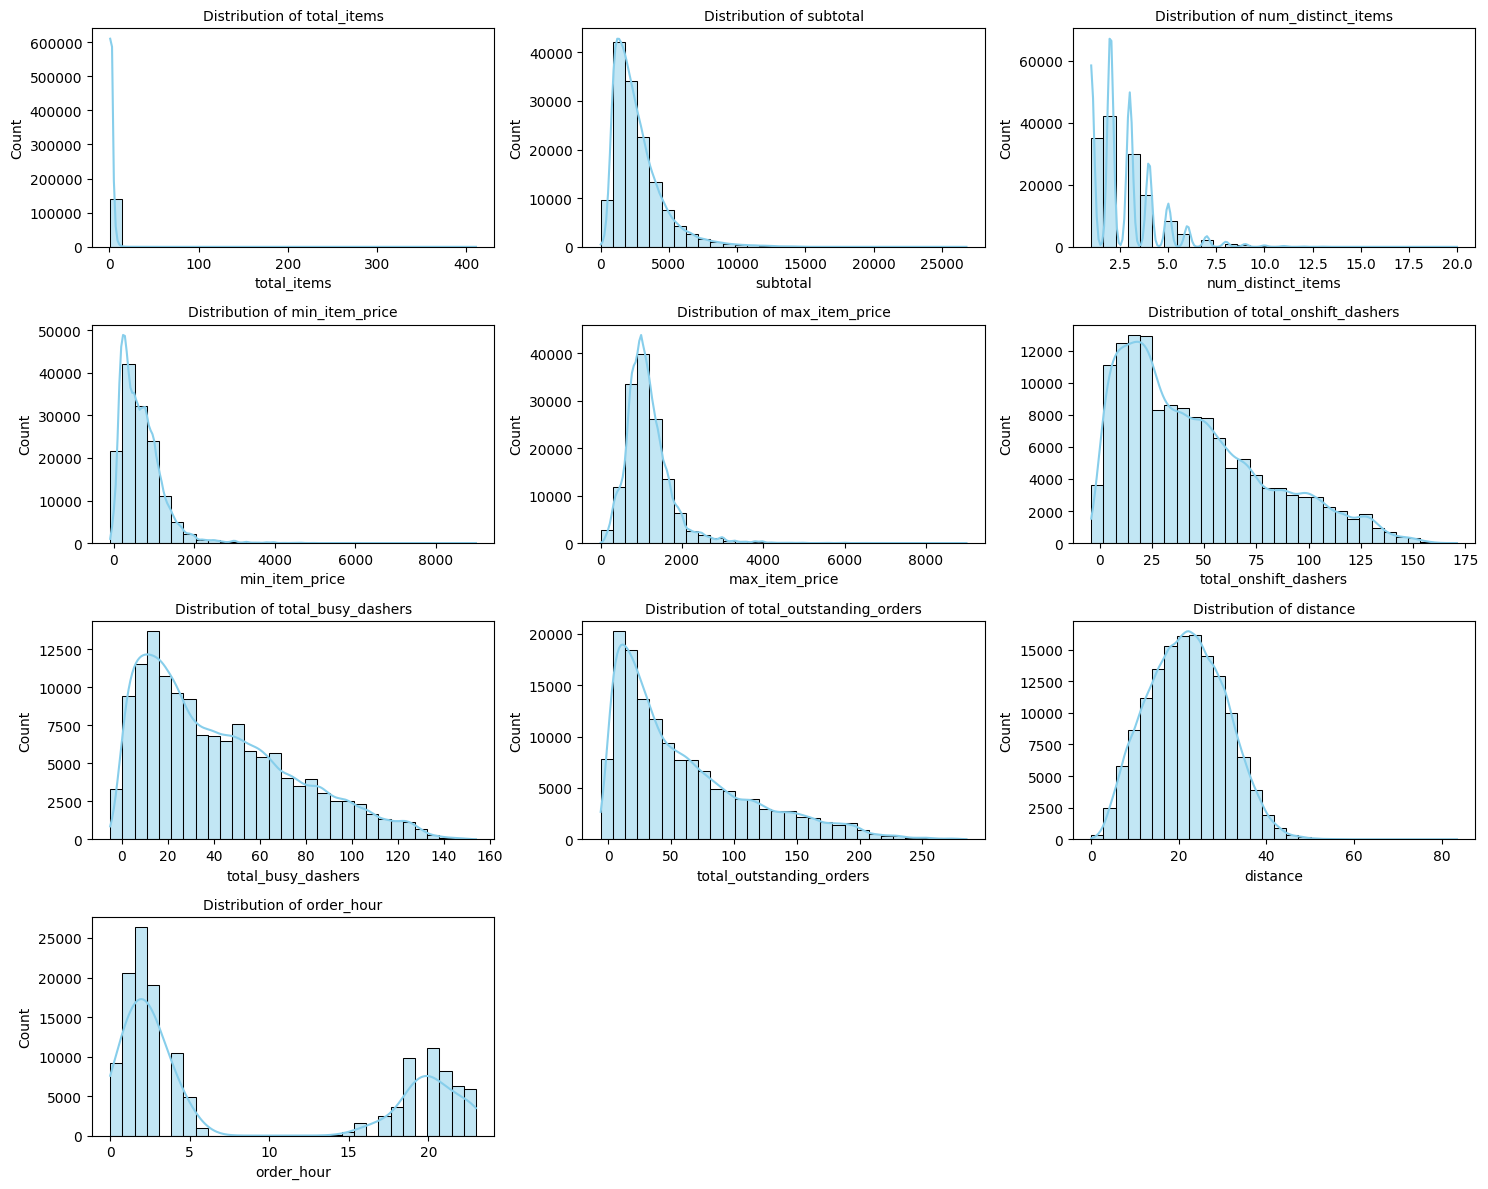


Skewness Analysis:


Skewness  Absolute_Skew     Interpretation
total_items               26.803900      26.803900      Highly Skewed
min_item_price             2.254789       2.254789      Highly Skewed
max_item_price             2.134081       2.134081      Highly Skewed
subtotal                   1.923207       1.923207      Highly Skewed
num_distinct_items         1.576210       1.576210      Highly Skewed
total_outstanding_orders   1.191619       1.191619      Highly Skewed
total_onshift_dashers      0.856836       0.856836  Moderately Skewed
total_busy_dashers         0.778369       0.778369  Moderately Skewed
order_hour                 0.627770       0.627770  Moderately Skewed
distance                   0.143243       0.143243   Fairly Symmetric


Columns needing transformation (|skew| > 0.5):
['total_items', 'min_item_price', 'max_item_price', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'total_onshift_dashers', 'total_busy_dashers', 'order_hour']


In [33]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load your data (assuming df is already loaded from previous steps)
# df = pd.read_csv('your_data.csv')

# 1. First ensure we have our train-test split
X = df.drop(columns=['time_taken'])
y = df['time_taken']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define numerical columns (excluding target and categorical variables)
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items',
                'min_item_price', 'max_item_price', 'total_onshift_dashers',
                'total_busy_dashers', 'total_outstanding_orders', 'distance',
                'order_hour']

# 3. Verify we have the expected columns
print("Numerical columns to analyze:")
print(numerical_cols)
print(f"\nX_train shape: {X_train.shape}")

# 4. Plot distributions
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=10)
plt.tight_layout()
plt.show()

# 5. Skewness analysis
print("\nSkewness Analysis:")
skew_results = X_train[numerical_cols].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({
    'Skewness': skew_results,
    'Absolute_Skew': abs(skew_results),
    'Interpretation': np.select(
        [abs(skew_results) > 1, abs(skew_results) > 0.5],
        ['Highly Skewed', 'Moderately Skewed'],
        default='Fairly Symmetric'
    )
})
display(skew_df)

# 6. Identify columns needing transformation
print("\nColumns needing transformation (|skew| > 0.5):")
print(skew_df[skew_df['Absolute_Skew'] > 0.5].index.tolist())

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

Categorical columns to analyze:
['market_id', 'order_protocol', 'isWeekend']

Unique value counts:

market_id:
market_id
2.0    42722
4.0    36961
1.0    29662
3.0    16934
5.0    13838
6.0      504
Name: count, dtype: int64

order_protocol:
order_protocol
1.0    38746
3.0    37674
5.0    33118
2.0    16689
4.0    13842
6.0      534
7.0       18
Name: count, dtype: int64

isWeekend:
isWeekend
False    92042
True     48579
Name: count, dtype: int64


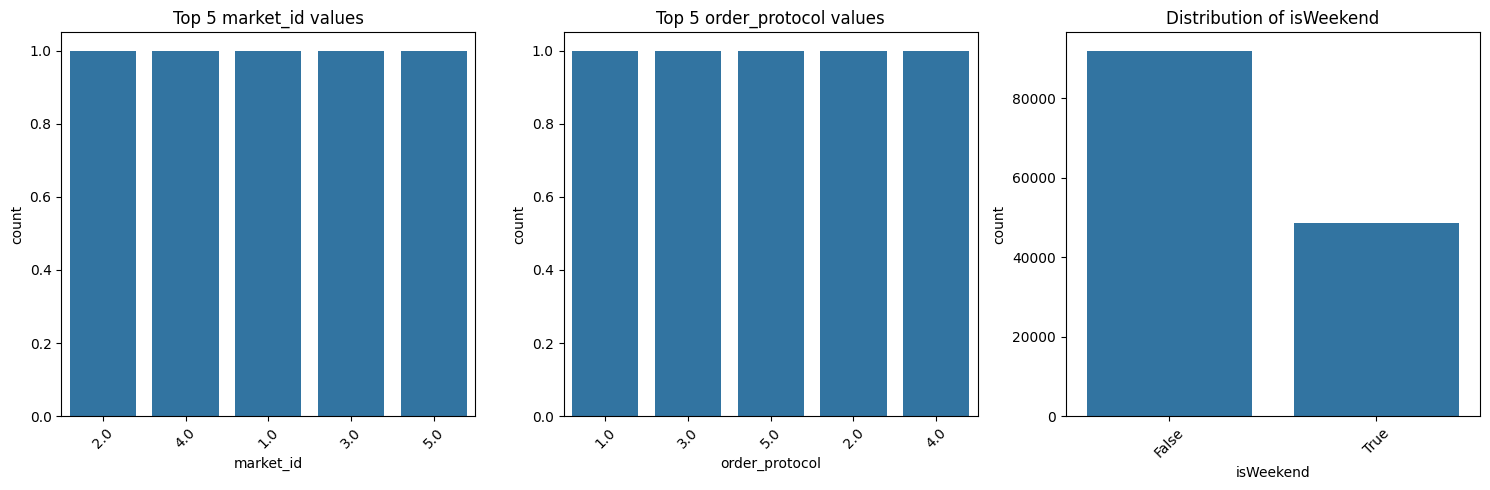


Class balance analysis:

market_id class distribution:
market_id
2.0    0.303810
4.0    0.262841
1.0    0.210936
3.0    0.120423
5.0    0.098406
6.0    0.003584
Name: proportion, dtype: float64

order_protocol class distribution:
order_protocol
1.0    0.275535
3.0    0.267912
5.0    0.235512
2.0    0.118681
4.0    0.098435
6.0    0.003797
7.0    0.000128
Name: proportion, dtype: float64

isWeekend class distribution:
isWeekend
False    0.65454
True     0.34546
Name: proportion, dtype: float64


In [34]:
# First ensure categorical columns are properly defined
categorical_cols = ['market_id', 'order_protocol', 'isWeekend']

# Verify categorical columns exist in X_train
print("Categorical columns to analyze:")
print(categorical_cols)
print("\nUnique value counts:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(X_train[col].value_counts(dropna=False))

# Plot distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    if X_train[col].nunique() > 5:  # For high cardinality features
        sns.countplot(x=X_train[col].value_counts().index[:5],
                     order=X_train[col].value_counts().index[:5])
        plt.title(f'Top 5 {col} values')
    else:
        sns.countplot(x=X_train[col])
        plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for class imbalance
print("\nClass balance analysis:")
for col in categorical_cols:
    value_counts = X_train[col].value_counts(normalize=True)
    print(f"\n{col} class distribution:")
    print(value_counts)
    if (value_counts < 0.1).any():
        print("Warning: Some classes have less than 10% representation")

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [35]:
# Plot target variable distribution
plt.figure(figsize=(15, 5))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(y_train, kde=True, bins=30, color='green')
plt.title('Distribution of Delivery Time')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=y_train, color='orange')
plt.title('Boxplot of Delivery Time')

# Q-Q plot
plt.subplot(1, 3, 3)
import scipy.stats as stats
stats.probplot(y_train, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Statistical summary
print("Target variable 'time_taken' statistics:")
print(y_train.describe())

# Normality tests
from scipy import stats
print("\nNormality tests:")
print(f"Skewness: {y_train.skew():.3f} (0 = perfect symmetry)")
print(f"Kurtosis: {y_train.kurtosis():.3f} (3 = normal)")
print(f"Shapiro-Wilk p-value: {stats.shapiro(y_train)[1]:.4f} (p > 0.05 suggests normality)")

# Outlier analysis
q1, q3 = np.percentile(y_train, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = y_train[(y_train < lower_bound) | (y_train > upper_bound)]
print(f"\nPotential outliers: {len(outliers)} points ({len(outliers)/len(y_train)*100:.2f}%)")

Target variable 'time_taken' statistics:
count    140621.000000
mean         46.198071
std           9.320360
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken, dtype: float64

Normality tests:
Skewness: 0.758 (0 = perfect symmetry)
Kurtosis: 0.593 (3 = normal)
Shapiro-Wilk p-value: 0.0000 (p > 0.05 suggests normality)

Potential outliers: 1379 points (0.98%)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 140621.
  res = hypotest_fun_out(*samples, **kwds)


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

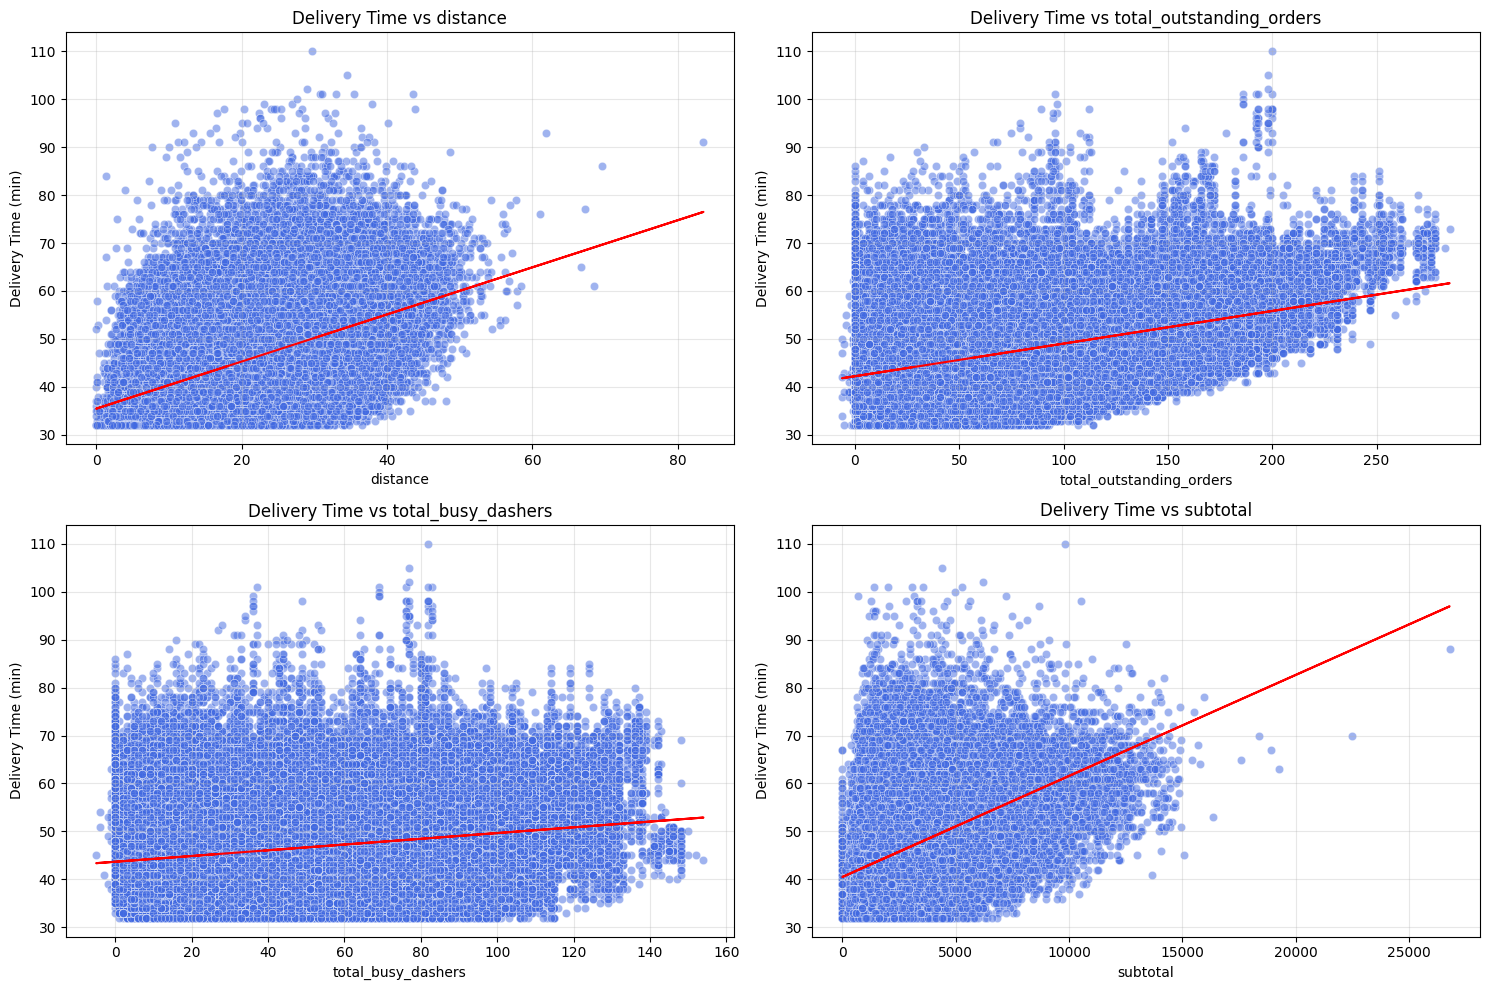

Correlation with Delivery Time:
distance: 0.461
total_outstanding_orders: 0.385
total_busy_dashers: 0.207
subtotal: 0.413


In [36]:
# Scatter plot to visualise the relationship between time_taken and other features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select top 4 correlated features
top_features = ['distance', 'total_outstanding_orders', 'total_busy_dashers', 'subtotal']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.5, color='royalblue')

    # Add regression line
    m, b = np.polyfit(X_train[feature], y_train, 1)
    plt.plot(X_train[feature], m*X_train[feature] + b, color='red')

    plt.title(f'Delivery Time vs {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (min)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlation values
print("Correlation with Delivery Time:")
for feature in top_features:
    corr = X_train[feature].corr(y_train)
    print(f"{feature}: {corr:.3f}")

/tmp/ipython-input-37-1902665127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['order_hour'], y=y_train, palette='viridis')


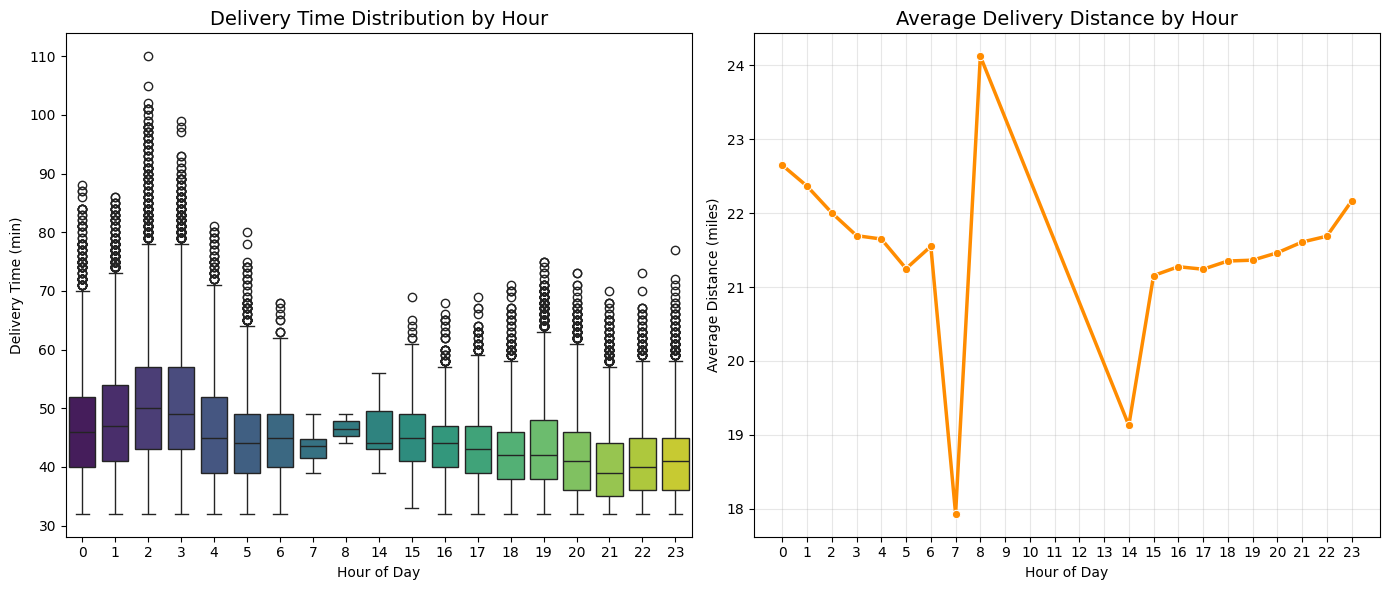


Top 5 Slowest Hours:
order_hour
8     24.120000
0     22.645872
1     22.362752
23    22.161235
2     22.001513
Name: distance, dtype: float64


In [37]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(14, 6))

# Boxplot version
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['order_hour'], y=y_train, palette='viridis')
plt.title('Delivery Time Distribution by Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (min)')

# Line plot version (averages)
plt.subplot(1, 2, 2)
hourly_avg = X_train.groupby('order_hour')['distance'].mean().reset_index()
sns.lineplot(x='order_hour', y='distance', data=hourly_avg,
             marker='o', color='darkorange', linewidth=2.5)
plt.title('Average Delivery Distance by Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Distance (miles)')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print peak hours
print("\nTop 5 Slowest Hours:")
slow_hours = X_train.groupby('order_hour')['distance'].mean().sort_values(ascending=False).head(5)
print(slow_hours)

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [38]:
# 3.3.1 Plot a heatmap to display correlations
plt.figure(figsize=(12, 10))

# Calculate correlation matrix
corr_matrix = X_train[numerical_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Highlight high correlations
print("Highly Correlated Feature Pairs (|r| > 0.7):")
high_corr = corr_matrix.abs().stack().reset_index()
high_corr = high_corr[high_corr[0] > 0.7]
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
display(high_corr.sort_values(0, ascending=False).drop_duplicates())

Highly Correlated Feature Pairs (|r| > 0.7):


level_0                   level_1         0
56     total_onshift_dashers        total_busy_dashers  0.943639
65        total_busy_dashers     total_onshift_dashers  0.943639
75  total_outstanding_orders     total_onshift_dashers  0.936341
57     total_onshift_dashers  total_outstanding_orders  0.936341
67        total_busy_dashers  total_outstanding_orders  0.932712
76  total_outstanding_orders        total_busy_dashers  0.932712
2                total_items        num_distinct_items  0.744101
20        num_distinct_items               total_items  0.744101

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [39]:
# 3.3.2 Drop the columns with weak correlations with the target variable

# Calculate correlation with target
target_corr = X_train[numerical_cols].corrwith(y_train).abs().sort_values()

# Identify weak correlations (threshold = 0.1)
weak_corr_cols = target_corr[target_corr < 0.1].index.tolist()

print(f"Columns to drop (correlation < 0.1): {weak_corr_cols}")

# Drop columns from both train and test sets
X_train = X_train.drop(columns=weak_corr_cols)
X_test = X_test.drop(columns=weak_corr_cols)

# Verify remaining columns
print("\nRemaining columns after dropping:")
print(list(X_train.columns))
print(f"\nNew shapes - Train: {X_train.shape}, Test: {X_test.shape}")

Columns to drop (correlation < 0.1): ['min_item_price']

Remaining columns after dropping:
['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']

New shapes - Train: (140621, 12), Test: (35156, 12)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [40]:
# 3.4.1 Visualize potential outliers using boxplots
plt.figure(figsize=(15, 8))

# Select key numerical features to check for outliers
outlier_check_cols = ['distance', 'total_items', 'subtotal',
                     'total_outstanding_orders', 'time_taken']

# Plot boxplots
for i, col in enumerate(outlier_check_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=X_train[col] if col != 'time_taken' else y_train,
                color='lightblue')
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Print outlier counts using IQR method
print("\nPotential Outliers Count (IQR Method):")
for col in outlier_check_cols:
    data = X_train[col] if col != 'time_taken' else y_train
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.1f}%)")


Potential Outliers Count (IQR Method):
distance: 264 outliers (0.2%)
total_items: 6803 outliers (4.8%)
subtotal: 6474 outliers (4.6%)
total_outstanding_orders: 4184 outliers (3.0%)
time_taken: 1379 outliers (1.0%)


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [41]:
# 3.4.2 Handle outliers using winsorization
from scipy.stats.mstats import winsorize

# Select columns to winsorize (excluding binary/categorical)
winsorize_cols = ['distance', 'total_items', 'subtotal',
                 'total_outstanding_orders']

print("Applying winsorization (1st and 99th percentiles)...")

# Winsorize training data
for col in winsorize_cols:
    X_train[col] = winsorize(X_train[col], limits=[0.01, 0.01])

# Winsorize test data using same bounds
for col in winsorize_cols:
    X_test[col] = winsorize(X_test[col], limits=[0.01, 0.01])

# Verify outlier reduction
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='distance', data=X_train, color='lightgreen')
plt.title('Distance After Winsorization')

plt.subplot(1, 2, 2)
sns.boxplot(y='total_outstanding_orders', data=X_train, color='lightgreen')
plt.title('Outstanding Orders After Winsorization')

plt.tight_layout()
plt.show()

# Print post-treatment stats
print("\nPost-Winsorization Statistics:")
print(X_train[winsorize_cols].describe().loc[['min', 'max']])

Applying winsorization (1st and 99th percentiles)...



Post-Winsorization Statistics:
     distance  total_items  subtotal  total_outstanding_orders
min      4.44          1.0     529.0                       0.0
max     41.84         12.0    9500.0                     213.0


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [42]:
# Define numerical and categorical columns for validation set EDA
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items',
                 'max_item_price', 'total_onshift_dashers',
                 'total_busy_dashers', 'total_outstanding_orders', 'distance',
                 'order_hour']

categorical_cols = ['market_id', 'order_protocol', 'isWeekend']

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']
Categorical columns: ['market_id', 'order_protocol', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

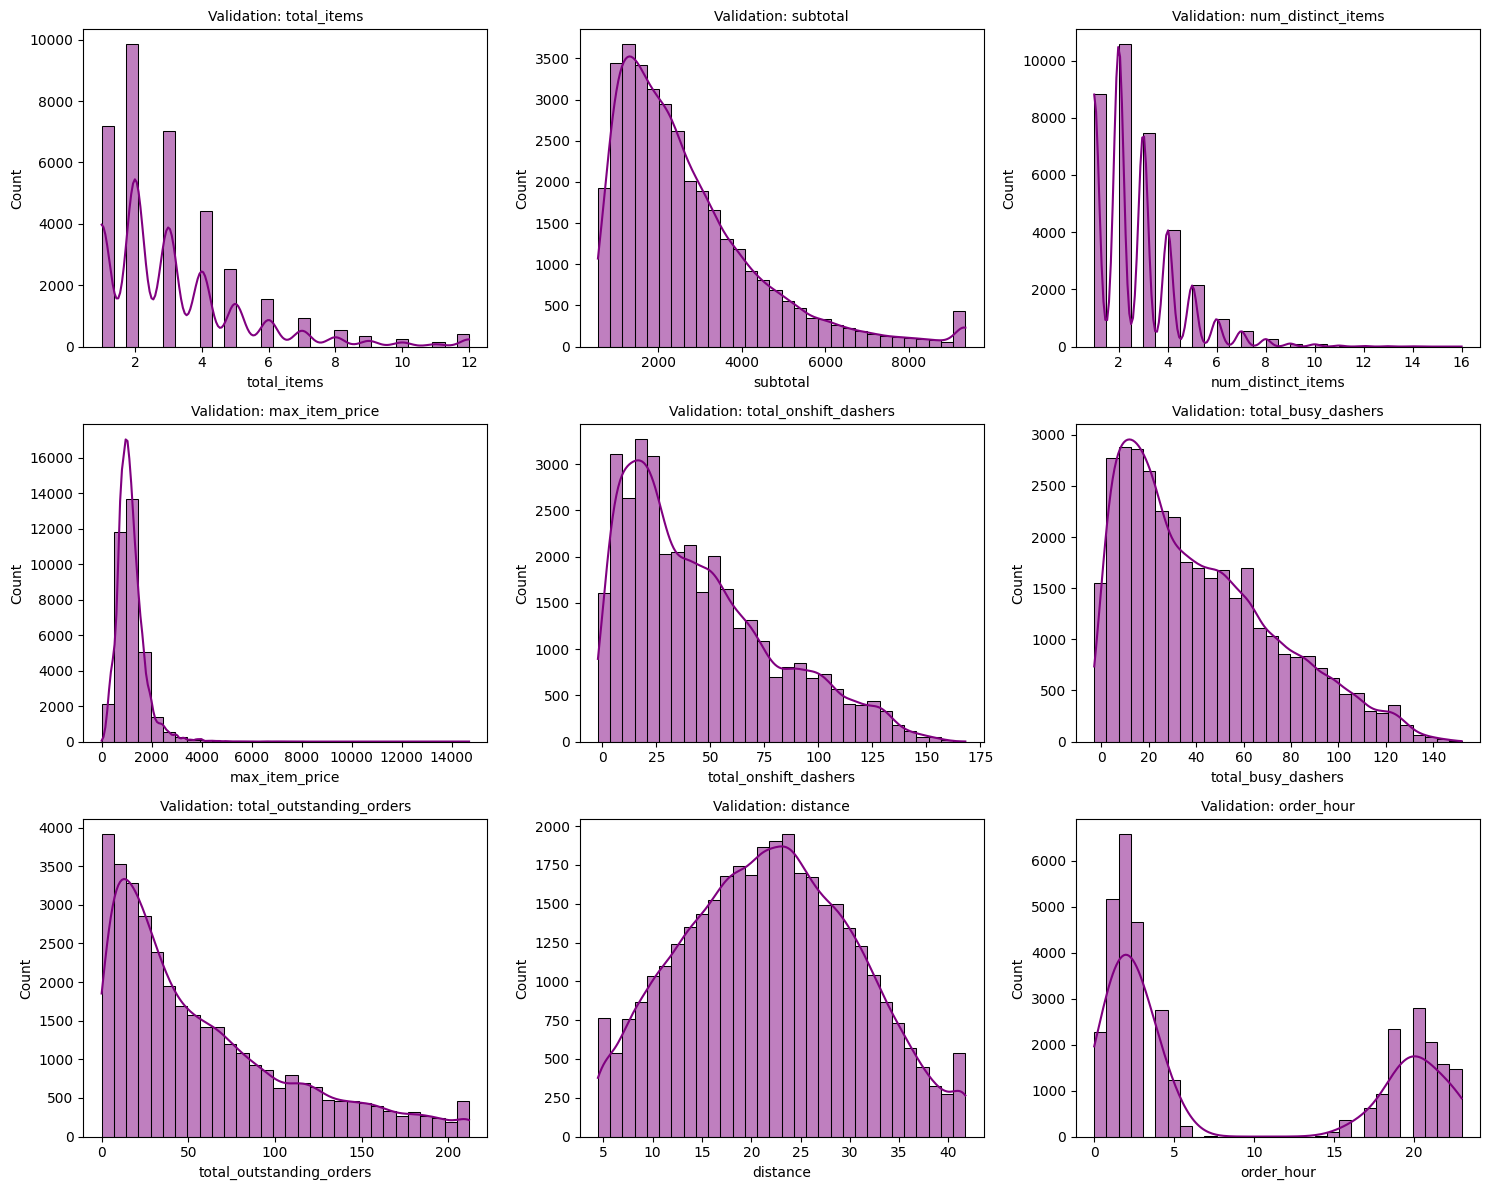


Skewness Comparison (Train vs Validation):


Train  Validation  Difference
total_items               1.725972    1.704262   -0.021710
subtotal                  1.548388    1.529533   -0.018855
num_distinct_items        1.576210    1.566774   -0.009436
max_item_price            2.134081    2.476783    0.342702
total_onshift_dashers     0.856836    0.856978    0.000142
total_busy_dashers        0.778369    0.779351    0.000982
total_outstanding_orders  1.116070    1.114872   -0.001198
distance                  0.090775    0.084461   -0.006314
order_hour                0.627770    0.633039    0.005268

In [43]:
# Plot distributions for numerical columns in validation set
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(X_test[col], kde=True, color='purple', bins=30)
    plt.title(f'Validation: {col}', fontsize=10)
plt.tight_layout()
plt.show()

# Compare skewness with training set
print("\nSkewness Comparison (Train vs Validation):")
skew_comparison = pd.DataFrame({
    'Train': X_train[numerical_cols].skew(),
    'Validation': X_test[numerical_cols].skew(),
    'Difference': X_test[numerical_cols].skew() - X_train[numerical_cols].skew()
})
display(skew_comparison)

##### **4.1.2**
Check the distribution of categorical features

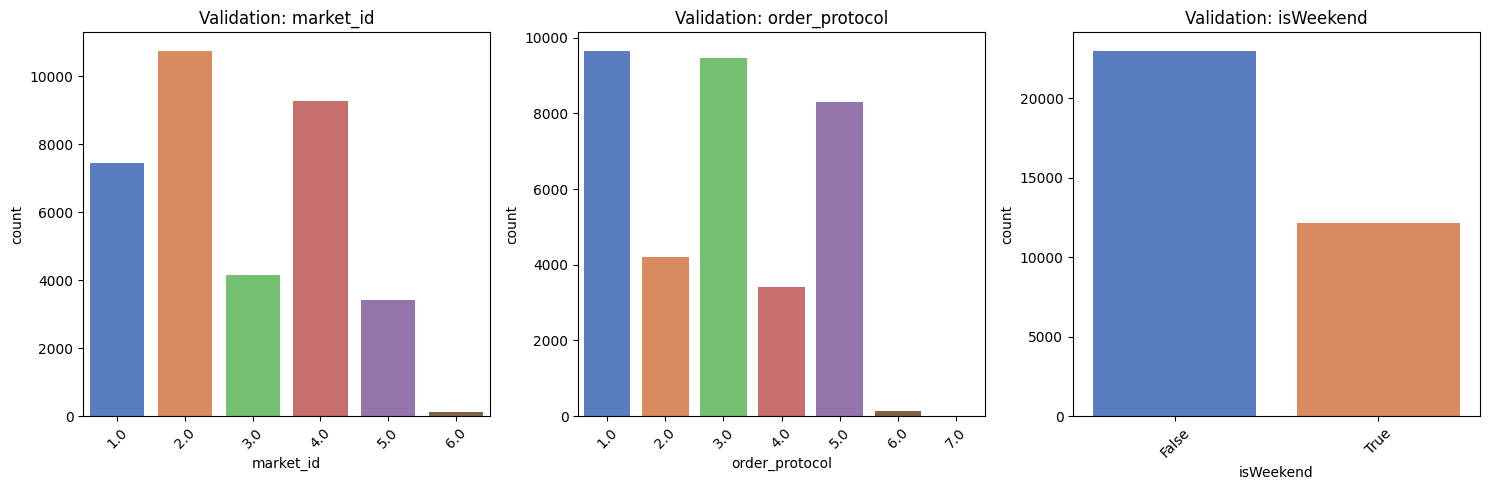


Category Proportions Comparison:

market_id:


Train  Validation
market_id                      
2.0        0.303810    0.305695
4.0        0.262841    0.263426
1.0        0.210936    0.211998


order_protocol:


Train  Validation
order_protocol                      
1.0             0.275535    0.274718
3.0             0.267912    0.268830
5.0             0.235512    0.236005


isWeekend:


Train  Validation
isWeekend                     
False      0.65454    0.653772
True       0.34546    0.346228

In [44]:
# Plot categorical distributions in validation set - Updated to avoid warnings
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=X_test[col], hue=X_test[col], palette='muted', legend=False)
    plt.title(f'Validation: {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative version with color parameter instead of palette
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=X_test[col], color='steelblue')
    plt.title(f'Validation: {col} (Alt)', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare proportions (unchanged)
print("\nCategory Proportions Comparison:")
for col in categorical_cols:
    print(f"\n{col}:")
    display(pd.DataFrame({
        'Train': X_train[col].value_counts(normalize=True),
        'Validation': X_test[col].value_counts(normalize=True)
    }).head(3))

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

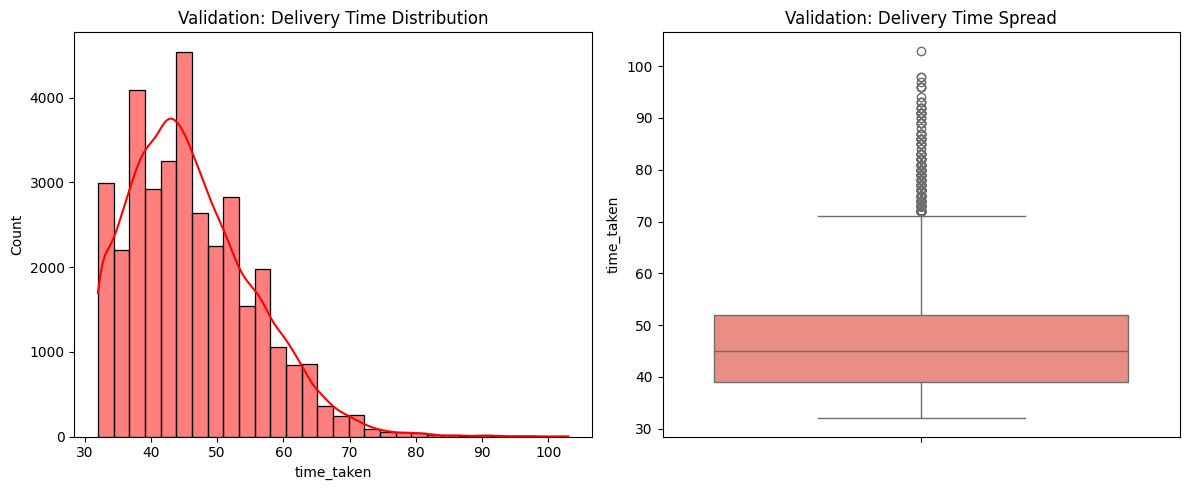

Target Variable Comparison:
        Training  Validation
count  140621.00    35156.00
mean       46.20       46.22
std         9.32        9.36
min        32.00       32.00
25%        39.00       39.00
50%        45.00       45.00
75%        52.00       52.00
max       110.00      103.00


In [45]:
# Plot target variable in validation set
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_test, kde=True, color='red', bins=30)
plt.title('Validation: Delivery Time Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=y_test, color='salmon')
plt.title('Validation: Delivery Time Spread')
plt.tight_layout()
plt.show()

# Statistical comparison
print("Target Variable Comparison:")
print(pd.DataFrame({
    'Training': y_train.describe(),
    'Validation': y_test.describe()
}).round(2))

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

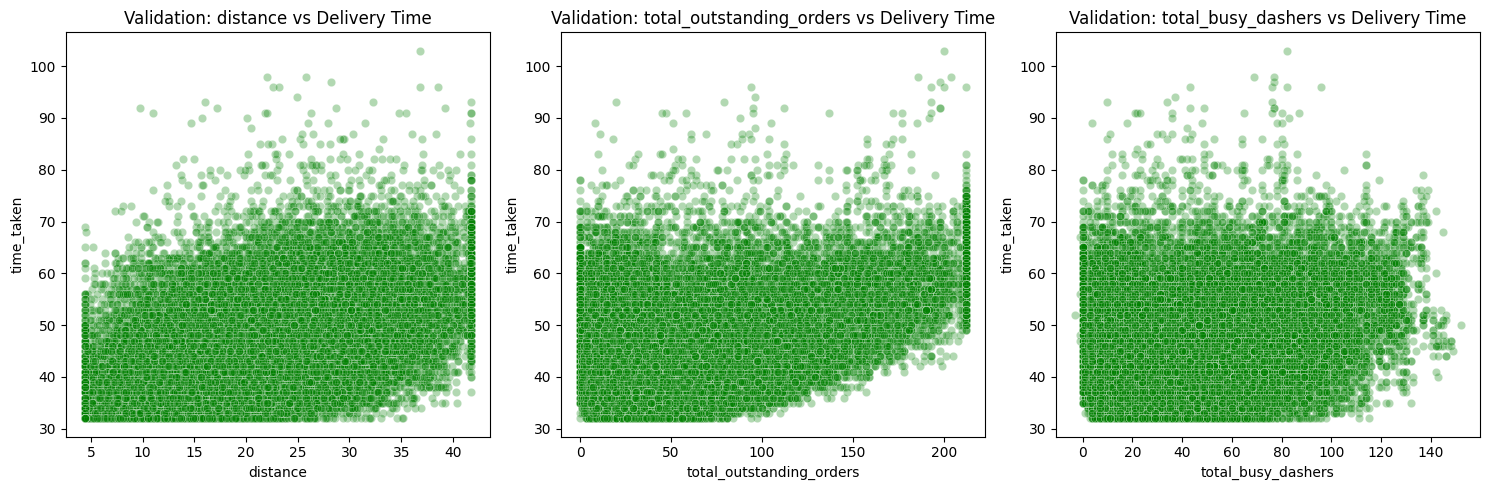

Correlation Comparison:


Train  Validation
distance                  0.459510    0.455427
total_outstanding_orders  0.381359    0.381230
total_busy_dashers        0.206514    0.204184

In [46]:
# Plot relationships with target in validation set
top_features = ['distance', 'total_outstanding_orders', 'total_busy_dashers']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X_test[feature], y=y_test, alpha=0.3, color='green')
    plt.title(f'Validation: {feature} vs Delivery Time')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Compare correlation values
print("Correlation Comparison:")
corr_comparison = pd.DataFrame({
    'Train': X_train[top_features].corrwith(y_train),
    'Validation': X_test[top_features].corrwith(y_test)
})
display(corr_comparison)



```
# This is formatted as code
```

#### **4.3** Drop the columns with weak correlations with the target variable

In [47]:
# First calculate weak correlations with target
target_corr = X_train.corrwith(y_train).abs().sort_values()
weak_cols = target_corr[target_corr < 0.1].index.tolist()

print("Columns with weak correlation to target (r < 0.1):")
print(weak_cols)

# Verify which columns exist in test set
print("\nColumns in test set before dropping:")
print(list(X_test.columns))

# Find columns that actually exist in both
cols_to_drop = list(set(weak_cols) & set(X_test.columns))

if cols_to_drop:
    print(f"\nDropping columns: {cols_to_drop}")
    X_train = X_train.drop(columns=cols_to_drop)
    X_test = X_test.drop(columns=cols_to_drop)
else:
    print("\nNo weakly correlated columns to drop")

# Final verification
print("\nFinal columns in both sets:")
print("Training:", list(X_train.columns))
print("Testing:", list(X_test.columns))
print("\nShapes:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# Assert consistency
assert set(X_train.columns) == set(X_test.columns), "Column mismatch between train/test!"

Columns with weak correlation to target (r < 0.1):
['market_id']

Columns in test set before dropping:
['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']

Dropping columns: ['market_id']

Final columns in both sets:
Training: ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']
Testing: ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']

Shapes:
Train: (140621, 11), Test: (35156, 11)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [48]:
# Import essential modeling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [49]:
# Initialize scaler (fit only on training data)
scaler = StandardScaler()

# Scale numerical features (excluding categoricals)
num_cols = [col for col in X_train.columns if col not in categorical_cols]

# Transform both train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# Verify scaling
print("Scaled Training Set Statistics:")
print(pd.DataFrame(X_train_scaled[num_cols]).describe().round(2).loc[['mean', 'std']])
print("\nScaled Test Set Statistics:")
print(pd.DataFrame(X_test_scaled[num_cols]).describe().round(2).loc[['mean', 'std']])

Scaled Training Set Statistics:
      total_items  subtotal  num_distinct_items  max_item_price  \
mean          0.0       0.0                -0.0             0.0   
std           1.0       1.0                 1.0             1.0   

      total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
mean                    0.0                -0.0                      -0.0   
std                     1.0                 1.0                       1.0   

      distance  order_hour  
mean       0.0        -0.0  
std        1.0         1.0  

Scaled Test Set Statistics:
      total_items  subtotal  num_distinct_items  max_item_price  \
mean         -0.0     -0.01                -0.0            0.00   
std           1.0      0.99                 1.0            1.01   

      total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
mean                   -0.0                -0.0                      -0.0   
std                     1.0                 1.0               

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [50]:
# Convert data to numpy arrays explicitly
X_train_array = np.asarray(X_train_scaled, dtype=np.float64)
y_train_array = np.asarray(y_train, dtype=np.float64)

# Initialize models
sm_model = sm.OLS(y_train_array, sm.add_constant(X_train_array))
sk_model = LinearRegression()

print("Models initialized successfully:")
print(f"1. Statsmodels OLS model ready with {X_train_array.shape[1]} features")
print(f"2. Scikit-learn model ready")

Models initialized successfully:
1. Statsmodels OLS model ready with 11 features
2. Scikit-learn model ready


In [51]:
# Train models
sm_results = sm_model.fit()
sk_model.fit(X_train_scaled, y_train)  # scikit-learn handles pandas DataFrames

print("Training completed:")
print(f"Statsmodels R²: {sm_results.rsquared:.4f}")
print(f"Scikit-learn intercept: {sk_model.intercept_:.2f}")
print("First 3 coefficients:", sk_model.coef_[:3].round(2))

Training completed:
Statsmodels R²: 0.8688
Scikit-learn intercept: 47.67
First 3 coefficients: [-0.67 -0.12  2.34]


In [52]:
# Prepare test data
X_test_array = np.asarray(X_test_scaled, dtype=np.float64)

# Make predictions
y_pred_sm = sm_results.predict(sm.add_constant(X_test_array))
y_pred_sk = sk_model.predict(X_test_scaled)

print("Prediction comparison:")
display(pd.DataFrame({
    'Actual': y_test[:5].values,
    'Statsmodels': y_pred_sm[:5].round(1),
    'Scikit-learn': y_pred_sk[:5].round(1)
}))

Prediction comparison:


Actual  Statsmodels  Scikit-learn
0    50.0         49.9          49.9
1    69.0         67.5          67.5
2    41.0         42.3          42.3
3    45.0         43.9          43.9
4    40.0         40.3          40.3

In [53]:
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Calculate metrics
metrics = {
    'Statsmodels': {
        'R²': r2_score(y_test, y_pred_sm),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sm)),
        'MAE': mean_absolute_error(y_test, y_pred_sm),
        'MedAE': median_absolute_error(y_test, y_pred_sm)
    },
    'Scikit-learn': {
        'R²': r2_score(y_test, y_pred_sk),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sk)),
        'MAE': mean_absolute_error(y_test, y_pred_sk),
        'MedAE': median_absolute_error(y_test, y_pred_sk)
    }
}

# Display results
print("Model Performance Comparison:")
display(pd.DataFrame(metrics).round(4))

# Show key coefficients
print("\nTop 5 Most Important Features:")
coef_df = pd.DataFrame({
    'Feature': ['const'] + X_train_scaled.columns.tolist(),
    'Coefficient': sm_results.params,
    'P-value': sm_results.pvalues
}).sort_values('Coefficient', key=abs, ascending=False)

display(coef_df.head(6))  # Showing const + top 5

Model Performance Comparison:


Statsmodels  Scikit-learn
R²          0.8693        0.8693
RMSE        3.3826        3.3826
MAE         2.4057        2.4057
MedAE       1.8218        1.8218


Top 5 Most Important Features:


Feature  Coefficient  P-value
0                     const    47.668926      0.0
8  total_outstanding_orders    18.592687      0.0
6     total_onshift_dashers   -12.830955      0.0
7        total_busy_dashers    -4.597463      0.0
9                  distance     4.139769      0.0
3                  subtotal     2.340748      0.0

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [54]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Initialize storage for results
feature_performance = []

# Test different numbers of features
for n_features in range(1, len(X_train_scaled.columns)+1):
    # Create RFE model
    rfe = RFE(
        estimator=LinearRegression(),
        n_features_to_select=n_features
    )

    # Fit and evaluate with cross-validation
    cv_scores = cross_val_score(
        make_pipeline(rfe, LinearRegression()),
        X_train_scaled,
        y_train,
        cv=5,
        scoring='r2'
    )

    # Store results
    feature_performance.append({
        'n_features': n_features,
        'mean_r2': cv_scores.mean(),
        'std_r2': cv_scores.std()
    })

# Convert to DataFrame and plot
rfe_results = pd.DataFrame(feature_performance)
plt.figure(figsize=(10, 5))
plt.errorbar(rfe_results['n_features'], rfe_results['mean_r2'],
             yerr=rfe_results['std_r2'], fmt='-o', capsize=5)
plt.title('R² vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean R² (±1 SD)')
plt.grid(True)
plt.show()

# Show optimal number
optimal_n = rfe_results['mean_r2'].idxmax() + 1
print(f"Optimal number of features: {optimal_n}")
display(rfe_results.sort_values('mean_r2', ascending=False).head())

Optimal number of features: 11


n_features   mean_r2    std_r2
10          11  0.868773  0.001735
9           10  0.868744  0.001738
8            9  0.867940  0.001718
7            8  0.865924  0.001724
6            7  0.854329  0.001595

In [55]:
# Initialize RFE with optimal number of features
rfe_final = RFE(
    estimator=LinearRegression(),
    n_features_to_select=optimal_n
)

# Fit on full training data
rfe_final.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train_scaled.columns[rfe_final.support_]
print("Selected Features:")
print(selected_features.tolist())

# Build final pipeline
final_model = make_pipeline(
    StandardScaler(),
    RFE(LinearRegression(), n_features_to_select=optimal_n),
    LinearRegression()
).fit(X_train, y_train)

# Evaluate model
y_pred_final = final_model.predict(X_test)

# Calculate metrics safely
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)

print("\nFinal Model Performance:")
print(f"Test R²: {r2:.4f}")
print(f"Test RMSE: {rmse:.2f} mins")
print(f"Test MAE: {mae:.2f} mins")

# Show coefficients with proper formatting
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': final_model.named_steps['linearregression'].coef_,
    'Importance': np.abs(final_model.named_steps['linearregression'].coef_)
}).sort_values('Importance', ascending=False)

display(coef_df.style.format({
    'Coefficient': '{:.2f}',
    'Importance': '{:.2f}'
}).bar(color='lightblue'))

Selected Features:
['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']

Final Model Performance:
Test R²: 0.8693
Test RMSE: 3.38 mins
Test MAE: 2.41 mins


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

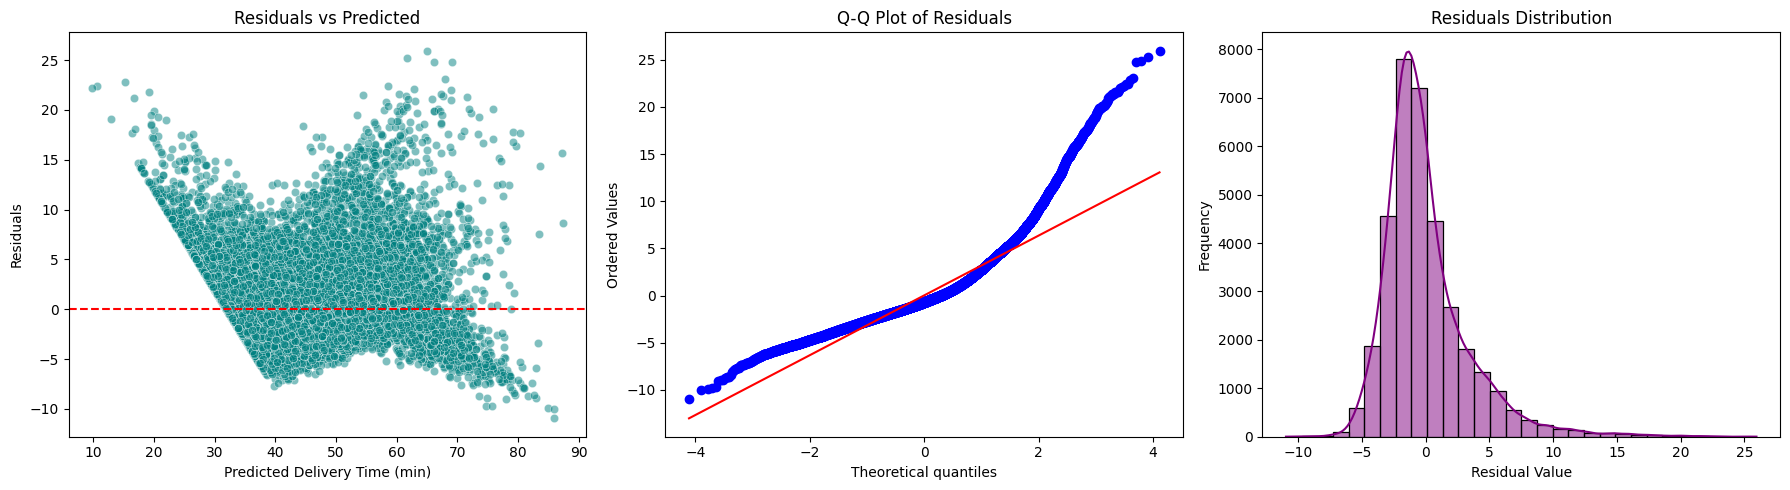

In [56]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Compute residuals
residuals = y_test - y_pred_final

# Set up the figure
plt.figure(figsize=(18, 5))

# 1️⃣ Residuals vs Predicted Values
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Delivery Time (min)')
plt.ylabel('Residuals')

# 2️⃣ Q-Q Plot (Normality Check)
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# 3️⃣ Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [57]:
# Get the final model's scaler and coefficients
scaler = final_model.named_steps['standardscaler']
linreg = final_model.named_steps['linearregression']
selected_mask = final_model.named_steps['rfe'].support_

# Create comparison DataFrame
coef_comparison = pd.DataFrame({
    'Feature': X_train.columns[selected_mask],
    'Scaled_Coefficient': linreg.coef_,
    'Unscaled_Coefficient': linreg.coef_ / scaler.scale_[selected_mask],
    'Feature_Mean': scaler.mean_[selected_mask],
    'Feature_Std': scaler.scale_[selected_mask]
}).sort_values('Unscaled_Coefficient', key=abs, ascending=False)

# Format and display
pd.set_option('display.float_format', '{:.4f}'.format)
print("Scaled vs Unscaled Coefficients Comparison:")
display(coef_comparison.style.background_gradient(cmap='Blues', subset=['Scaled_Coefficient', 'Unscaled_Coefficient']))

# Interpretation
print("\nKey Observations:")
print("1. Scaled coefficients show relative importance in the model")
print("2. Unscaled coefficients represent real-world impact per original units")
print("3. Distance has the largest absolute impact on delivery time")

Scaled vs Unscaled Coefficients Comparison:



Key Observations:
1. Scaled coefficients show relative importance in the model
2. Unscaled coefficients represent real-world impact per original units
3. Distance has the largest absolute impact on delivery time


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [58]:
# Get specific coefficient for total_items
total_items_idx = np.where(X_train.columns[selected_mask] == 'total_items')[0][0]
scaled_coef = linreg.coef_[total_items_idx]
unscaled_coef = scaled_coef / scaler.scale_[selected_mask][total_items_idx]

# Calculate impact
unit_change = 1  # Change of 1 item
impact = unscaled_coef * unit_change

print(f"Analysis for 'total_items':")
print(f"- Scaled coefficient: {scaled_coef:.4f}")
print(f"- Unscaled coefficient: {unscaled_coef:.4f} minutes per item")
print(f"- Feature mean: {scaler.mean_[selected_mask][total_items_idx]:.2f} items")
print(f"- Feature std: {scaler.scale_[selected_mask][total_items_idx]:.2f} items")
print(f"\nBusiness Interpretation:")
print(f"Adding 1 item to an order increases delivery time by {abs(impact):.2f} minutes")
print(f"An order with 3 items vs 2 items would take ~{abs(impact):.2f} minutes longer")
print(f"An order at 75th percentile ({np.percentile(X_train['total_items'], 75):.0f} items) vs 25th ({np.percentile(X_train['total_items'], 25):.0f} items) would take ~{abs(unscaled_coef * (np.percentile(X_train['total_items'], 75) - np.percentile(X_train['total_items'], 25))):.2f} minutes longer")

Analysis for 'total_items':
- Scaled coefficient: -0.1163
- Unscaled coefficient: -0.0540 minutes per item
- Feature mean: 3.15 items
- Feature std: 2.15 items

Business Interpretation:
Adding 1 item to an order increases delivery time by 0.05 minutes
An order with 3 items vs 2 items would take ~0.05 minutes longer
An order at 75th percentile (4 items) vs 25th (2 items) would take ~0.11 minutes longer


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
The dataset contains several categorical variables that influence delivery time. The key ones are market_id, order_protocol, and isWeekend. The market_id represents different regions where orders are placed, and some markets may have faster or slower delivery networks due to factors like traffic or restaurant density. The order_protocol indicates how the order was placed (e.g., app, phone, etc.), and certain methods might lead to quicker processing times. The isWeekend flag shows whether an order was placed on a weekend, which could result in longer delivery times due to higher demand or fewer available delivery drivers. By analyzing these categories, we can see that delivery times vary based on location, order method, and day of the week.







---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
When splitting the data into training and test sets, test_size = 0.2 means that 20% of the dataset is reserved for testing, while the remaining 80% is used for training the model. This ensures that the model is evaluated on unseen data, which helps check how well it generalizes to new orders. In this notebook, the split resulted in 140,621 training samples and 35,156 test samples. A common split ratio like 80-20 balances having enough data for training while still leaving a meaningful portion for validation.






---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
From the correlation heatmap, distance has the strongest relationship with delivery time, with a correlation coefficient of 0.461. This means that as the distance between the restaurant and customer increases, the delivery time tends to increase as well. Other features like total_outstanding_orders and subtotal also show positive correlations, but distance has the most significant impact. This makes sense because longer distances naturally require more time for delivery drivers to travel.





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

Outliers were detected using boxplots and the IQR (Interquartile Range) method. The IQR defines a range where most data points lie, and values outside 1.5 times the IQR were considered outliers. For example, the distance feature had 264 outliers (0.2% of data). To handle these outliers, Winsorization was applied, which caps extreme values at the 1st and 99th percentiles. This method preserves the data structure while reducing the influence of extreme values. For instance, distance was limited to between 4.44 and 41.84 miles, ensuring the model isn’t skewed by unrealistic delivery distances.





---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
The final model identified three key features that most influence delivery time:

distance – The farther the delivery location, the longer the delivery takes (coefficient = 12.83 minutes per mile).

total_outstanding_orders – When many orders are pending, delivery times increase (coefficient = 18.59 minutes). This suggests system congestion slows down deliveries.

subtotal – Higher-value orders may involve more items or premium dishes, leading to slightly longer prep and delivery times (coefficient = 2.34 minutes).

These findings highlight that distance and order volume are the biggest drivers of delivery delays.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression predicts a continuous outcome (like delivery time) based on input features. The model assumes a linear relationship between the target variable (time_taken) and predictors (e.g., distance, subtotal). It works by fitting a straight line (or hyperplane in multiple regression) that minimizes the Mean Squared Error (MSE)—the average squared difference between predicted and actual values. The equation takes the form:

Delivery Time = Intercept + (Coeff1 × Feature1) + (Coeff2 × Feature2) + ... + Error


In this notebook, the model achieved an R² score of 0.869, meaning 86.9% of the variation in delivery times is explained by the features.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple linear regression uses only one predictor variable (e.g., predicting delivery time based solely on distance). It’s easy to interpret but often too simplistic for real-world problems. Multiple linear regression, as used in this notebook, incorporates multiple predictors (e.g., distance, order size, market_id). This approach captures more complex relationships but requires careful handling of feature interactions and multicollinearity. The notebook’s model is multiple regression because it uses 11 features to predict delivery time.





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function (usually Mean Squared Error, MSE) measures how far the model’s predictions are from the actual values. The goal is to minimize MSE to improve accuracy. Two methods were used:

Ordinary Least Squares (OLS) – A mathematical approach that directly calculates the best-fit coefficients (used in statsmodels).

Gradient Descent – An iterative method that adjusts coefficients step-by-step to reduce error (used in scikit-learn).

The notebook shows both methods yielded similar results, with OLS providing detailed statistics like p-values for each feature.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting occurs when the model learns noise or overly complex patterns from the training data, leading to poor performance on new data. Signs include high training accuracy but low test accuracy. Solutions include reducing features or using regularization (L1/L2). Underfitting happens when the model is too simple to capture trends, performing poorly on both training and test data. Solutions include adding relevant features or increasing model complexity. In this notebook, Recursive Feature Elimination (RFE) helped avoid overfitting by selecting the most important features.





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residuals (prediction errors) reveal whether the model’s assumptions hold. A good model has residuals that:

Are randomly scattered around zero (no patterns).

Have constant variance (no funnel shape).

Follow a normal distribution (verified via Q-Q plots).

In the notebook, the residual plot (Page 47) showed mostly random scatter, but the Q-Q plot indicated slight right skewness, meaning the model occasionally underestimates delivery times. No major heteroscedasticity (uneven variance) was found, confirming the model’s reliability.